In [12]:
import cv2
import random
import matplotlib.pyplot as plt

import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

Посмотрим на первый кадр видео

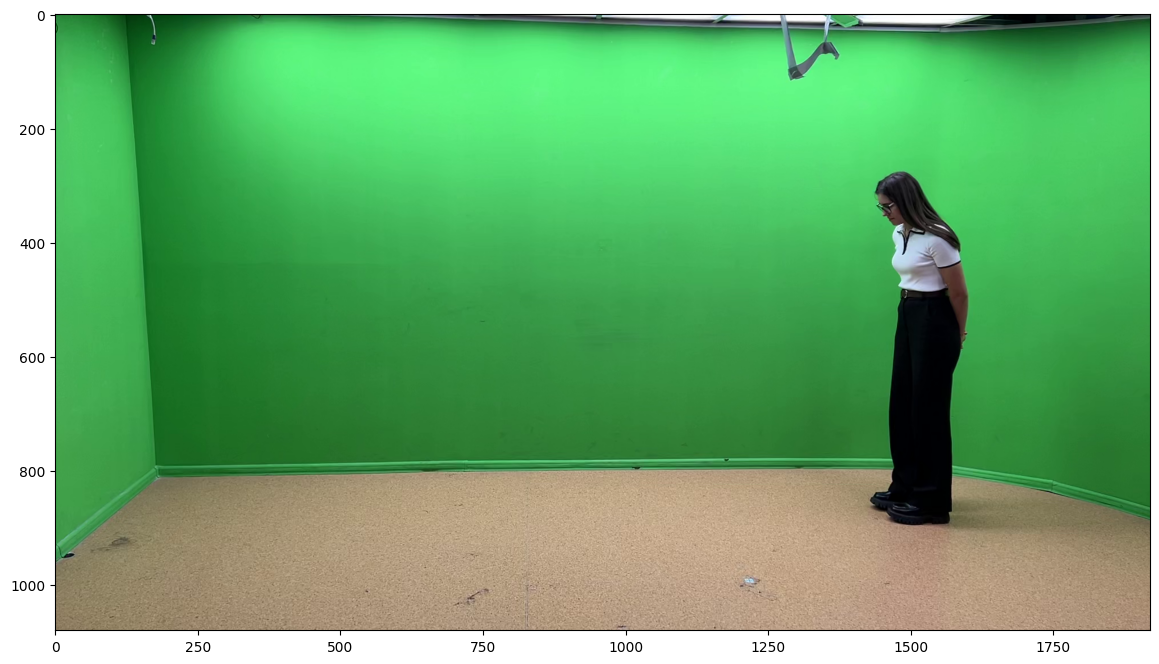

In [13]:
my_video = 'alina.mov'
cap = cv2.VideoCapture(my_video)
ret, frame_bgr = cap.read()
frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb);

Нужно подобрать пороги для функции `inRange()`. Сначала я думала взять в качестве определяющего элемента свою белую кофту, но это было неудачным решением, так как белый дверной проем тоже перетягивал на себя внимание, поэтому я решила выбрать свои черные брюки. Поэтому пороги подбирались для черного цвета

In [18]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 950)
ret, frame = cap.read()

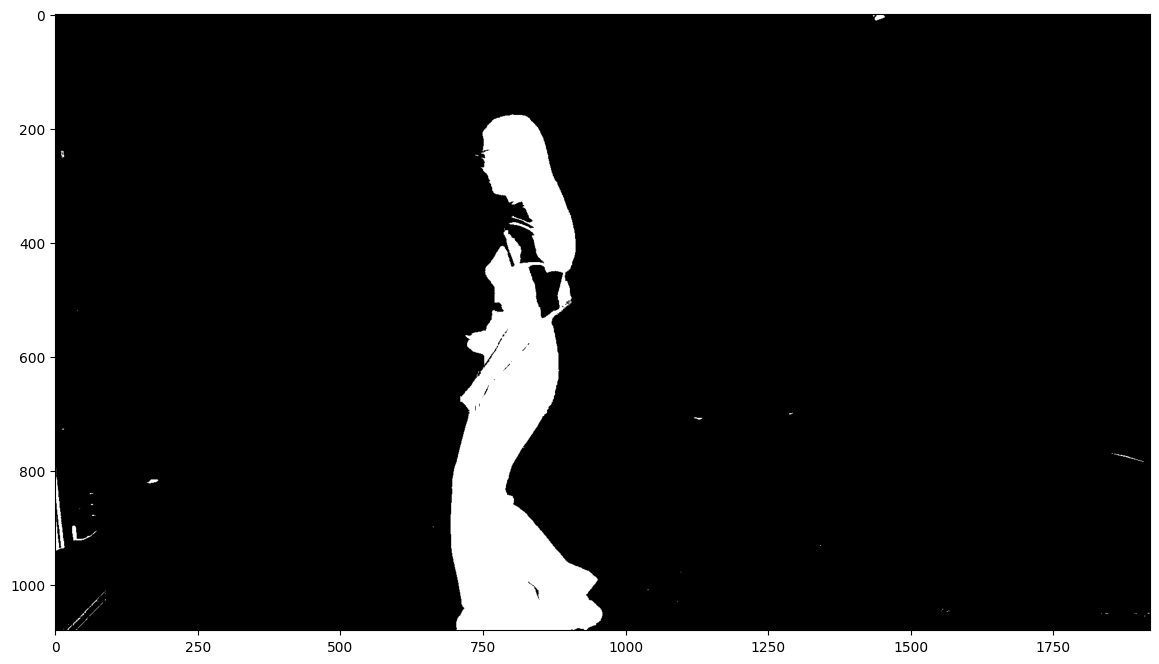

In [19]:
image = frame.copy()
image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_black = (0, 0, 0)
higher_black = (190, 255, 90)
image_thresholded = cv2.inRange(image_HSV, lower_black, higher_black)
plt.imshow(image_thresholded, cmap='grey');

Как видим черные брюки хорошо выделяются при таких границах

In [20]:
# Функция нахождения координат центроида
def find_centroid(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)

        moments = cv2.moments(largest_contour)

        if moments["m00"] != 0:
            cx = int(moments["m10"] / moments["m00"])
            cy = int(moments["m01"] / moments["m00"])
        else:
            cx, cy = 0, 0

        return cx, cy
    return None

In [21]:
# Функция отрисовки всех точек детекции
def draw_detection_route(frame, points, points_color, thickness, markerSize):
    for ((cx, cy), color) in zip(points, points_color):
        cv2.drawMarker(
            frame,
            (cx, cy),
            color=color,
            thickness=thickness,
            markerType=cv2.MARKER_TILTED_CROSS,
            line_type=cv2.LINE_AA,
            markerSize=markerSize
        )

In [22]:
# Функция для подсчета цвета для эффекта градиента точек
def calculate_color(frame_number, total_frames, start_color, end_color):
    ratio = frame_number / total_frames * 0.2
    r, g, b = random.randint(0, 1), random.randint(0, 1), random.randint(0, 1)
    new_color = (
        int(start_color[0] + (end_color[0] - start_color[0]) * ratio * r),
        int(start_color[1] + (end_color[1] - start_color[1]) * ratio * g),
        int(start_color[2] + (end_color[2] - start_color[2]) * ratio * b)
    )
    
    return new_color

[Ссылка](https://disk.yandex.ru/i/jJ0pDBD2Xx05wg) на исходное видео

In [23]:
my_video = 'alina.mov'
cap = cv2.VideoCapture(my_video)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

writer = cv2.VideoWriter(
    'alina_result.mp4',
    cv2.VideoWriter_fourcc(*'MP4V'),
    60,
    (int(cap.get(3)), int(cap.get(4)))
)

In [24]:
color = (250, 250, 250)   # (60, 158, 232)
end_color = (10, 10, 50)
thickness = 2
marker_size = 10

lower_black = (0, 0, 0)
higher_black = (190, 255, 90)

count_frames = 0
points = []
points_color = []
ret = True

In [25]:
while ret:
    ret, frame_bgr = cap.read()
    if ret:
        count_frames += 1
        image_HSV = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2HSV)
        image_thresholded = cv2.inRange(image_HSV, lower_black, higher_black)
        coordinates = find_centroid(image_thresholded)
        if coordinates:
            points.append(coordinates)
            points_color.append(color)

        draw_detection_route(frame_bgr, points, points_color, thickness, marker_size)

        if count_frames % 50 == 0:
            color = calculate_color(count_frames, total_frames, color, end_color)

        writer.write(frame_bgr)

writer.release()
print('Video is done!')

Video is done!


[Ссылка](https://disk.yandex.ru/i/B2o01YfxKkrLlA) на результат